<a href="https://colab.research.google.com/github/dsp196/Internshala_assignments/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required libraries 
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import cifar10

In [2]:
(trainX, trainy), (testX, testy) = cifar10.load_data() #Train loader and Test loader 
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape)) 
#Normalizing Training Data
train_norm_x = trainX/255.0
test_norm_x =testX/255.0

170508288/170498071 [==============================] - 4s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [3]:
#HyperParameters for training
LEARNING_RATE =0.001
EPOCHS=50

In [6]:
class ModelA(): ##Model NetA
    
  def create_model_NetA(self):
    NnetA = tf.keras.Sequential(name="NetA")
    NnetA.add(layers.Flatten(input_shape = (32,32,3) )) # Image Flattening  to a single vector 
    NnetA.add(layers.Dense(10,activation='linear')) #Output layer
    return NnetA
  



In [7]:
class ModelB(): ##Model NetB
  def create_model_NetB(self):
    NnetB = tf.keras.Sequential(name="NetB")
    NnetB.add(layers.Flatten(input_shape = (32,32,3) ))  # Image Flattening  to a single vector
    NnetB.add(layers.Dense(300,activation='relu')) #Hidden layer with 300 units
    NnetB.add(layers.Dense(10)) #OutPut Layer
    return NnetB
    

In [8]:
class ModelC():
  def create_model_NetC(self):
    NnetC = tf.keras.Sequential(name="NetC")
    NnetC.add(layers.Conv2D(25,(5,5),activation='relu',input_shape=(32,32,3))) #Convolutional Layer - 25 filters each with (5,5)  
    NnetC.add(layers.MaxPooling2D((2, 2),strides=(2, 2))) ##Maxpooling layer of (2,2) size with stride (2,2)
    NnetC.add(layers.Flatten()) # Image Flattening layer
    NnetC.add(layers.Dense(10)) #Output Layer
    return NnetC

In [9]:
modelA = ModelA()
NetA =modelA.create_model_NetA()

In [11]:
modelB = ModelB()
NetB = modelB.create_model_NetB()

In [10]:
modelC = ModelC()
NetC = modelC.create_model_NetC()

In [12]:
model_list =[NetA,NetB,NetC]

In [13]:
def compile_train_model(models,x_train, y_train,
                        learning_rate=LEARNING_RATE,epochs=EPOCHS):
  histories=[] #for recording model metrics
  Test_acc =[] # for recording model test accuracy
  model_names = [] #List of model names 
  
  """
  Compiles and trains the Keras models with the given data. 
  Used  Adam optimizer for this implementation.
  
  learning_rate: Learning rate for the optimizer Adam
  epochs: Number of epochs to train
  """
  for model in models:
    model_copy = model
    model_copy.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    print(model.summary())
    history = model_copy.fit(train_norm_x,trainy,epochs=EPOCHS,validation_data=(test_norm_x, testy)) #Training Model
    test_accuracy = model.evaluate(test_norm_x,testy,verbose=1) ## Evaluating trained Model
    histories.append(history)
    Test_acc.append(test_accuracy)
    model_names.append(model_copy.name)
  return histories,Test_acc,model_names

In [14]:
model_histories,Test_accuracies,Model_names = compile_train_model(model_list,train_norm_x,trainy,EPOCHS,LEARNING_RATE)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "NetA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1563/1563 [==============================] - 7s 2ms/step - loss: 18276.9512 - accuracy: 0.2369 - val_loss: 15277.5283 - val_accuracy: 0.2578
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 16583.3887 - accuracy: 0.2568 - val_loss: 17580.9238 - val_accuracy: 0.2357
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 15849.7354 - accuracy: 0.2687 - val_loss: 20506.8027 - val_accuracy: 0.1984
Epoch 4/50
1563/1563 [==============================] - 4s 

In [15]:
print(Model_names)

['NetA', 'NetB', 'NetC']


In [16]:
def plot_curves(histories,Test_accuracies,model_names):
  #history = model.history
  
  for (index,model_history,model_name,Test_accuracies) in zip(range(3),histories,model_names,Test_accuracies):
    print("model {0} has {1} Training accuracy and {2} Test accuracy".format(model_names[index],model_history.history['accuracy'][-1],Test_accuracies[1]))
    plt.subplots()
    plt.plot(model_history.history['accuracy'])
    plt.plot(model_history.history['val_accuracy'])
    plt.title('model accuracy of {0}'.format(model_name))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
  
  

model NetA has 0.3041599988937378 Training accuracy and 0.2678999900817871 Test accuracy
model NetB has 0.10109999775886536 Training accuracy and 0.10000000149011612 Test accuracy
model NetC has 0.10198000073432922 Training accuracy and 0.10000000149011612 Test accuracy


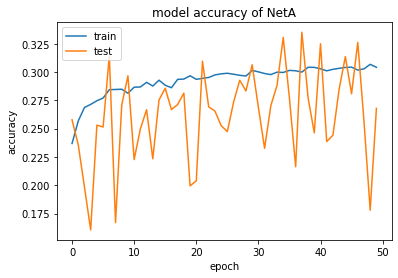

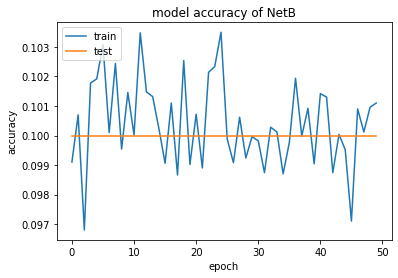

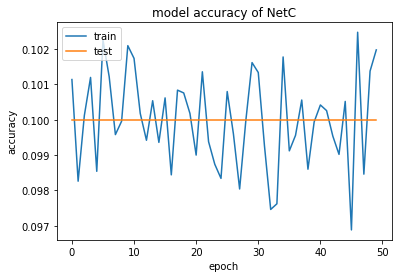

In [18]:
plot_curves(model_histories,Test_accuracies,Model_names)